In [21]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = load_iris()
X = data.data
y = data.target # for reference, not used in clustering
target_names = data.target_names

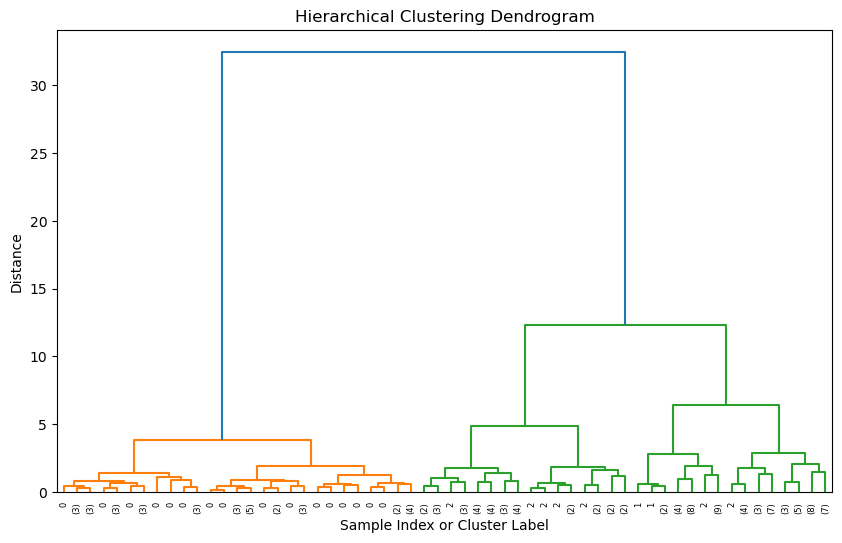

In [9]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')  # Try 'single', 'complete', 'average'

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=data.target, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Label")
plt.ylabel("Distance")
plt.show()

In [10]:
cluster_ids = fcluster(linked, t=3, criterion='maxclust')  # 't' is number of clusters

# Step 4: Add cluster IDs to a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['ClusterID'] = cluster_ids

# Optional: Show a few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   ClusterID  
0          1  
1          1  
2          1  
3          1  
4          1  


In [12]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/Users/nitinarora/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


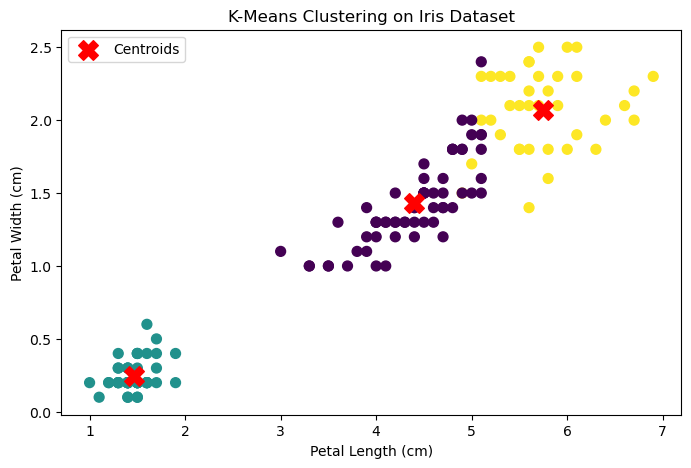

In [13]:
# Visualize in 2D using just two features: petal length & petal width
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Optional: convert to DataFrame for better visualization
df = pd.DataFrame(X, columns = data.feature_names)
df['target'] = y

# Train-test split (80% train, 20% test)
# X, y loaded earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Create the KNN classifier (let's try with k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report
)
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Step 1: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Step 2: Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.72962445 0.22850762]
Total variance captured: 0.9581320720000165


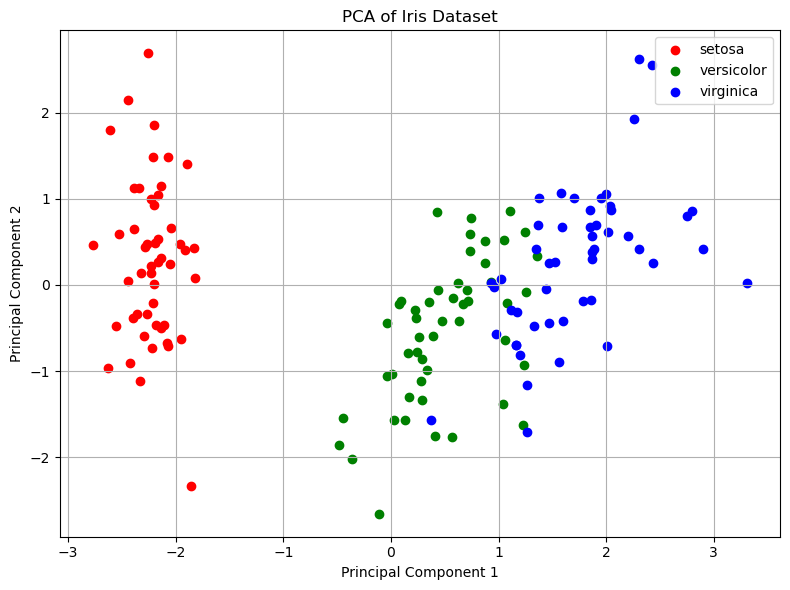

In [25]:
# Step 3: Visualize the results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=label)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

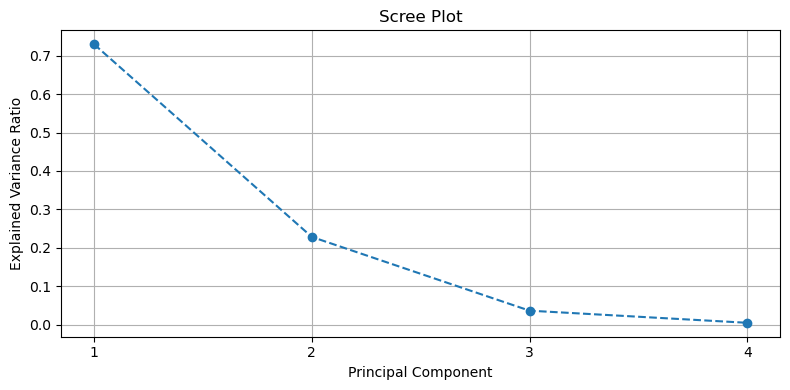

In [27]:
# Step 4: Plot the Scree plot

# Fit PCA with all components
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()